In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split #serpara los datos 
from sklearn.metrics import confusion_matrix, classification_report #estos los regulatado las claisigfacion y la matriz de confusion
from sklearn.preprocessing import StandardScaler #normalizar los datos 

In [2]:
def to_classlabel(z):
    return z.argmax(axis = 1) #etiqeuta en la columna



In [3]:
#y susecion de numeros, 
def one_hot_encode(y):
    n_class = np.unique(y).shape[0] #cunatas clases tiene Y 
    y_encode = np.zeros((y.shape[0], n_class)) #inicialzia la tabla, rengloes(instancias ) columnas numero de clases
    for idx, val in enumerate(y):
        y_encode[idx, val] = 1.0
    return y_encode




In [4]:
# Define Accuracy
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc #presicion 



In [ ]:
class Logistic_Regression_AdamD():
    
    def __init__(self, lambda_param=0.01):
        self.theta = None
        self.lambda_param = lambda_param 
        
    
    def _sigmoid(self, A, theta):
        yh = np.dot(A, theta)
        yh = np.clip(yh, -500, 500)
        return 1/(1 + np.exp(-yh))



    #fiunciond e cosot binaria 
    """def _loss(self, y, h):
        '''
        a really small value 'epsilon' is added to avoid 
        overflow and divison by zero error for log
        loss = (-1/q) * sum(y * log(h) + (1-y) * log(1 - h))
        where h = 1/(1 + e^(-yh))
        '''
        #el epsislon funciona por si la hipotrsis nos da 0 (log -> logaritmo natural )
        epsilon = 1e-5
        # modificacion 
        h = np.clip(h, epsilon, 1 - epsilon)
        # Pérdida con regularización L2
        reg_term = (self.lambda_param/(2*len(y))) * np.sum(self.theta[1:]**2)
        los = (-1/len(y)) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h+epsilon)) + reg_term
        return los"""
    
    def _loss(self, y, h, theta):
        
        epsilon = 1e-5
        h = np.clip(h, epsilon, 1 - epsilon)
        n = len(y)
        loss = - (1/n) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        reg_term = (self.lambda_param/(2*n)) * np.sum(theta[1:]**2)
        return loss + reg_term
    
    def gradient(self, A, y, h, theta):
       
        n = len(y)
        error = h - y
        grad = (1/n) * np.dot(A.T, error)
        grad[1:] += (self.lambda_param/n) * theta[1:]
        return grad

    def fit(self, A, y, learning_rate=0.001, beta1=0.9, beta2=0.999, 
            epsilon=1e-8, epochs=100, batch_size=32, show_step=10, 
            stopping_threshold=1e-6, verbose=False):
        ''' 
        Entrenamiento con AdamD 
        Parámetros:
        -----------
        A: matriz de diseño (incluye columna de unos)
        y: vector de etiquetas (0 o 1)
        learning_rate: tasa de aprendizaje (alpha)
        beta1, beta2: parámetros de momento
        epsilon: constante de estabilidad numérica
        epochs: número máximo de épocas
        batch_size: tamaño del minilote
        show_step: cada cuántas épocas mostrar información
        stopping_threshold: umbral de parada temprana (cambio en pérdida)
        verbose: si True, imprime progreso
        '''
        n_obs, n_features = A.shape
        self.theta = np.random.randn(n_features) * 0.01
        m = np.zeros(n_features)
        v = np.zeros(n_features)
        t = 0
        
        epoch_losses = []
        previous_loss = np.inf
        
        for epoch in range(epochs):
        
            permutation = np.random.permutation(n_obs)
            A_shuffled = A[permutation]
            y_shuffled = y[permutation]
            
            epoch_loss = 0.0
            n_batches = n_obs // batch_size
            residual = n_obs % batch_size
            total_batches = n_batches + (1 if residual != 0 else 0)
            
            for batch_idx in range(total_batches):
                t += 1
                start = batch_idx * batch_size
                end = start + batch_size
            
                if batch_idx == total_batches - 1 and residual != 0:
                    end = start + residual
                
                A_batch = A_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                h_batch = self._sigmoid(A_batch, self.theta)
                loss_batch = self._loss(y_batch, h_batch, self.theta)
                epoch_loss += loss_batch * len(y_batch)
                
                grad = self.gradient(A_batch, y_batch, h_batch, self.theta)
                
            
                m = beta1 * m + (1 - beta1) * grad
                v = beta2 * v + (1 - beta2) * (grad ** 2)
                
               
                alpha_t = learning_rate * np.sqrt(1 - beta2**t)
                
                self.theta -= alpha_t * m / (np.sqrt(v) + epsilon)
            
            epoch_loss /= n_obs
            epoch_losses.append(epoch_loss)
            
           
            if epoch > 10 and abs(previous_loss - epoch_loss) < stopping_threshold:
                if verbose:
                    print(f"Early stopping at epoch {epoch}")
                break
                
            previous_loss = epoch_loss
            
            if verbose and epoch % show_step == 0:
                print(f'Epoch: {epoch}, Loss: {epoch_loss:.3e}')
        
        return self.theta, epoch_losses
    
    def predict(self, A, threshold=0.5):
        y_predicted = self._sigmoid(A, self.theta)
        # Usar vectorización en lugar de comprensión de lista
        return (y_predicted >= threshold).astype(int)




In [6]:

# # Read the data
# data = np.loadtxt('admisiones_dataset.txt',delimiter=',')
# inputs = data[:,0:2]
# idx = 2-data[:,2] #restamos el 1 para establecer el categorico, adminitivos - 1 no admitivos - 0 
# targets = np.array(idx, dtype=int)     # codificacion categorica
# # targets = one_hot_encode(labels)      # one hot encode to classlabel


# Leer datos desde archivo .dat
try:
    # Intenta leer como archivo de texto
    data = np.loadtxt('cancer_dataset.dat', delimiter=',')
except:
    # Intenta leer como binario si falla
    data = np.fromfile('cancer_dataset.dat', dtype=np.float32)
    data = data.reshape((-1, 31))  # Ajustar según la estructura de tus datos

# Procesamiento de datos
inputs = data[:, :-1]
targets = data[:, -1].astype(int)

In [7]:


# Split the data
# x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.40,random_state=1234) # test_size genreta entrenamiento y prueba 

# División de datos
x_train, x_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.3, random_state=42
)


In [8]:
# Normalización
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [9]:

#matrices de disenio, 
A_train = np.c_[np.ones(len(x_train)), x_train]
A_test  = np.c_[np.ones(len(x_test)), x_test]

In [10]:

# Parámetros para el constructor

#minilot4es
# Hiperparámetros para AdamD
# lambda_param = 0.01 
# fit_params = {
#     'learning_rate': 1e-4,
#     'beta1': 0.9,
#     'beta2': 0.999,
#     'epsilon': 1e-8,
#     'epochs': 1000,
#     'batch_size': 128,  
#     'show_step': 100,
#     'stopping_threshold': 1e-4,
#     'verbose': True
# }


#online
# lambda_param = 0.01  
# fit_params = {
#     'learning_rate': 1e-4,
#     'beta1': 0.9,
#     'beta2': 0.999,
#     'epsilon': 1e-8,
#     'epochs': 1000,
#     'batch_size': 1,  
#     'show_step': 100,
#     'stopping_threshold': 1e-4,
#     'verbose': True
# }


# #lote completo
lambda_param = 0.01  
fit_params = {
    'learning_rate': 1e-4,
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 1e-8,
    'epochs': 1000,
    'batch_size': len(y_train),  
    'show_step': 100,
    'stopping_threshold': 1e-4,
    'verbose': True
}

In [11]:


# # Build and fit best LR model
# alpha = 0.01 #lr
# maxEpochs = 5000
# batch = 10 #minilotes
# show = 500 #view

# # Build model
# log_model = Logistic_Regression()
# # Fit Model
# theta, batch_loss, epoch_loss = log_model.fit(A_train, y_train, learning_rate=alpha, 
#                                 epochs=maxEpochs, batch_size=batch, show_step = show, verbose=True)


# Entrenamiento del modelo
model = Logistic_Regression_AdamD(lambda_param=lambda_param)
theta, epoch_losses = model.fit(A_train, y_train, **fit_params)

Epoch: 0, Loss: 6.956e-01
Epoch: 100, Loss: 6.632e-01
Epoch: 200, Loss: 6.298e-01
Epoch: 300, Loss: 5.987e-01
Epoch: 400, Loss: 5.697e-01
Epoch: 500, Loss: 5.426e-01
Epoch: 600, Loss: 5.174e-01
Epoch: 700, Loss: 4.938e-01
Epoch: 800, Loss: 4.718e-01
Epoch: 900, Loss: 4.513e-01


In [12]:


# Predicciones y evaluación
# Predicciones
train_pred = model.predict(A_train)
test_pred = model.predict(A_test)

In [14]:

# # Calculate accuracy
# train_acc = accuracy(y_train, train_pred)
# print(f'Accuracy on training set: {train_acc}')
#resultados finales
# Resultados en entrenamiento
print("\nresultados en conjunto de entrenamiento:")
print(f'Accuracy: {accuracy(y_train, train_pred):.4f}')
print("Matriz de confusión:")
print(confusion_matrix(y_train, train_pred))
print("Reporte de clasificación:")
print(classification_report(y_train, train_pred))


resultados en conjunto de entrenamiento:
Accuracy: 0.9775
Matriz de confusión:
[[318  10]
 [  1 160]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       328
           1       0.94      0.99      0.97       161

    accuracy                           0.98       489
   macro avg       0.97      0.98      0.97       489
weighted avg       0.98      0.98      0.98       489



In [15]:


# Calculate metrics - son de entrenamiento 
# cm_train = confusion_matrix(y_train, train_pred)
# train_report = classification_report(y_train, train_pred)

# print("Performance on training set:\n")
# print(f'Confusion Matrix:\n {cm_train}\n')
# print(f'Classification Report:\n {train_report}')

# Resultados en prueba
print("\nresultados en conjunto de prueba:")
print(f'Accuracy: {accuracy(y_test, test_pred):.4f}')
print("Matriz de confusión:")
print(confusion_matrix(y_test, test_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, test_pred))


resultados en conjunto de prueba:
Accuracy: 0.9810
Matriz de confusión:
[[127   3]
 [  1  79]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       130
           1       0.96      0.99      0.98        80

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



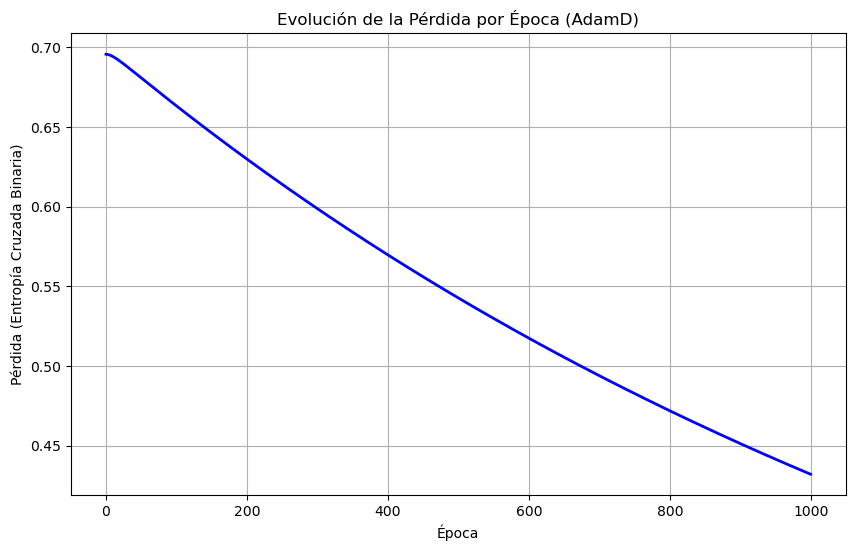

In [16]:

# Gráfica de pérdida
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, 'b-', linewidth=2)
plt.title('Evolución de la Pérdida por Época (AdamD)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.grid(True)
plt.show()